# Random Forest

In [53]:
# Import Numpy dan Pandas untuk Manipulasi Data
import numpy as np
import pandas as pd

In [54]:
app_train = pd.read_csv(r'C:\Users\LENOVO\OneDrive\Documents\DATASET\home-credit-default-risk\application_train.csv')

In [55]:
pd.set_option("display.max_columns", 200)

# Import Scikit-Learn untuk Preprocessing Variabel Kategori
from sklearn.preprocessing import LabelEncoder

# Menekan Peringatan
import warnings
warnings.filterwarnings('ignore')

# Import Matplotlib dan Seaborn untuk Plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
# Training data
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [57]:
app_train['SK_ID_CURR'].nunique()

307511

In [58]:
app_train['TARGET'].value_counts() # ketidakseimbangan kelas

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [59]:
app_test = pd.read_csv(r'C:\Users\LENOVO\OneDrive\Documents\DATASET\home-credit-default-risk\application_test.csv')

In [60]:
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

In [61]:
bureau = pd.read_csv(r'C:\Users\LENOVO\OneDrive\Documents\DATASET\home-credit-default-risk\bureau.csv')

In [62]:
print('bureau data shape: ', bureau.shape)
bureau.head()

bureau data shape:  (1716428, 17)


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [63]:
bureau_agg = bureau.groupby('SK_ID_CURR').last().reset_index()

In [64]:
bureau_agg.shape

(305811, 17)

In [65]:
bureau_agg.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,100001,5896636,Active,currency 1,-320,0,411.0,-1328.0,NaN,0,168345.0,110281.5,0.0,0.0,Consumer credit,-10,9364.5
1,100002,6113835,Closed,currency 1,-1043,0,62.0,-967.0,0.0,0,67500.0,245781.0,0.0,0.0,Credit card,-758,0.0
2,100003,5885880,Active,currency 1,-606,0,1216.0,-621.0,0.0,0,810000.0,0.0,810000.0,0.0,Credit card,-43,NaN
3,100004,6829134,Closed,currency 1,-408,0,-382.0,-382.0,0.0,0,94537.8,0.0,0.0,0.0,Consumer credit,-382,NaN
4,100005,6735202,Active,currency 1,-62,0,122.0,-123.0,0.0,0,29826.0,25321.5,0.0,0.0,Consumer credit,-31,4261.5


# EDA

## memeriksa Distribusi Kolom Target

Target adalah apa yang diminta untuk kita prediksi: nilai 0 untuk pinjaman yang dilunasi tepat waktu, atau nilai 1 yang mengindikasikan bahwa nasabah mengalami kesulitan pembayaran. Pertama-tama kita dapat memeriksa jumlah pinjaman yang masuk ke dalam setiap kategori.

In [66]:
app_train['TARGET'].value_counts()


TARGET
0    282686
1     24825
Name: count, dtype: int64

In [67]:
app_train['TARGET'].value_counts() / app_train.shape[0] * 100

TARGET
0    91.927118
1     8.072882
Name: count, dtype: float64

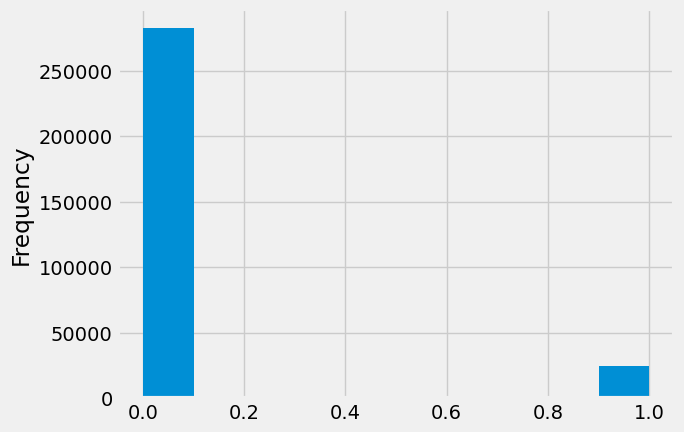

In [68]:
app_train['TARGET'].astype(int).plot.hist();

Dari informasi ini, saya melihat bahwa ini adalah masalah kelas yang tidak seimbang. Ada lebih banyak pinjaman yang dilunasi tepat waktu daripada pinjaman yang tidak dilunasi. Setelah saya masuk ke model machine learning, kita dapat memberi bobot pada kelas-kelas tersebut berdasarkan representasi mereka dalam data untuk mencerminkan ketidakseimbangan ini.

# Memeriksa Nilai yang Hilang

In [69]:
# Function to calculate missing values by column# Funct
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [70]:
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


Ketika tiba saatnya untuk membangun model machine learning, saya harus mengisi nilai yang hilang ini dikenal sebagai imputasi. Dalam pekerjaan selanjutnya, saya akan menggunakan model seperti XGBoost yang dapat menangani nilai yang hilang tanpa perlu melakukan imputasi. Pilihan lainnya adalah membuang kolom-kolom dengan persentase nilai yang hilang yang tinggi, meskipun tidak mungkin untuk mengetahui sebelumnya apakah kolom-kolom ini akan berguna bagi model. Oleh karena itu, saya akan menyimpan semua kolom untuk saat ini.

## tipe kolom

In [71]:
# menghitung jumlah kolom untuk setiap tipe data
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

Sekarang saya akan  melihat jumlah entri unik di setiap kolom objek (kategorikal).

Sekarang saya akan  melihat jumlah entri unik di setiap kolom objek (kategorikal).

In [72]:
# Jumlah kelas unik di setiap kolom objek
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)


NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

Sebagian besar variabel kategorikal memiliki jumlah entri unik yang relatif kecil. Kita harus menemukan cara untuk menangani variabel kategorikal ini!

In [73]:
app_train['ORGANIZATION_TYPE'].value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7      

## Encoding Categorical Variables

In [74]:
# Membuat objek label encoder
le = LabelEncoder()
le_count = 0

# iterasi pada semua kolom
for col in app_train:
    if app_train[col].dtype == 'object':
        # Jika 2 kategori unik atau kurang dari itu
        if len(list(app_train[col].unique())) <= 2:
            # latih training data
            le.fit(app_train[col])
            # transformasi training dan testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])

            # Melacak berapa banyak kolom yang dikodekan labelnya
            le_count += 1

print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [75]:
# one-hot encoding untuk variabel kategorikal

app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


### Menyelaraskan Training dan Testing Data


In [76]:
train_labels = app_train['TARGET']

# Sejajarkan training dan testing data, pertahankan hanya kolom yang ada di kedua data
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Tambahkan target kembali ke dalam
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


Dataset pelatihan dan pengujian sekarang memiliki fitur yang sama yang diperlukan untuk machine learning. Jumlah fitur telah bertambah secara signifikan. Pada suatu saat saya mungkin ingin mencoba pengurangan dimensi (menghapus fitur yang tidak relevan) untuk mengurangi ukuran dataset.

# Exploratory Data Analysis

Salah satu masalah yang selalu ingin saya waspadai saat melakukan EDA adalah anomali dalam data. Hal ini dapat disebabkan oleh angka yang salah ketik, kesalahan dalam peralatan pengukuran, atau bisa juga pengukuran yang valid namun ekstrem. Salah satu cara untuk mendukung anomali secara kuantitatif adalah dengan melihat statistik dari sebuah kolom dengan menggunakan metode deskripsi. Angka-angka dalam kolom DAYS_BIRTH bernilai negatif karena angka-angka tersebut dicatat relatif terhadap pengajuan pinjaman saat ini. Untuk melihat statistik ini dalam tahun, kita dapat mengalikannya dengan -1 dan membaginya dengan jumlah hari dalam setahun:

In [77]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

Usia-usia tersebut terlihat masuk akal. Tidak ada outlier untuk usia di ujung atas atau bawah. Bagaimana dengan masa kerja?


In [78]:
app_train['DAYS_EMPLOYED'].describe()


count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

ini sebuah kesalahan. Nilai maksimumnya (selain positif) adalah sekitar 1000 tahun

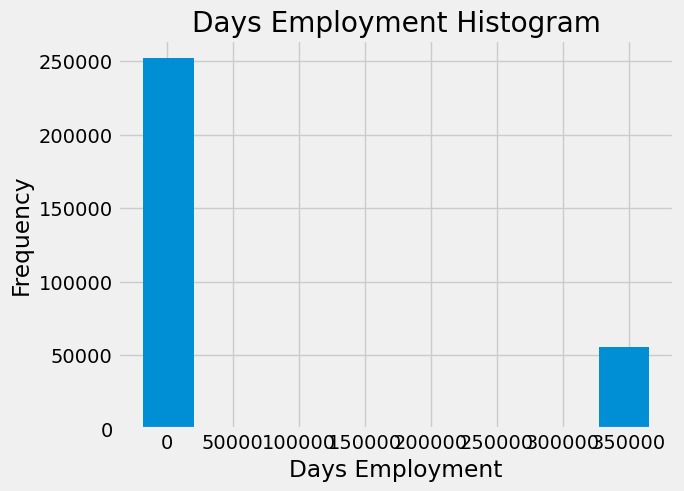

In [79]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

Karena penasaran, saya akan melakukan subset klien yang anomali dan lihat apakah mereka cenderung memiliki tingkat gagal bayar yang lebih tinggi atau lebih rendah daripada klien lainnya.

In [80]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


 Ternyata anomali memiliki tingkat kegagalan yang lebih rendah. Penanganan anomali tergantung pada situasi yang tepat, tanpa aturan yang pasti. Salah satu pendekatan yang paling aman adalah dengan mengatur anomali menjadi nilai yang hilang dan kemudian mengisinya (menggunakan Imputasi) sebelum membuat model. Dalam kasus ini, karena semua anomali memiliki nilai yang sama persis, saya ingin mengisinya dengan nilai yang sama jika semua pinjaman ini memiliki kesamaan. Nilai anomali tampaknya memiliki arti penting, jadi saya ingin memberi tahu model machine learning jika kita benar-benar mengisi nilai tersebut. Sebagai solusinya, saya akan mengisi nilai anomali dengan bukan angka (np.nan) dan kemudian membuat kolom boolean baru yang mengindikasikan apakah nilai tersebut anomali atau tidak.

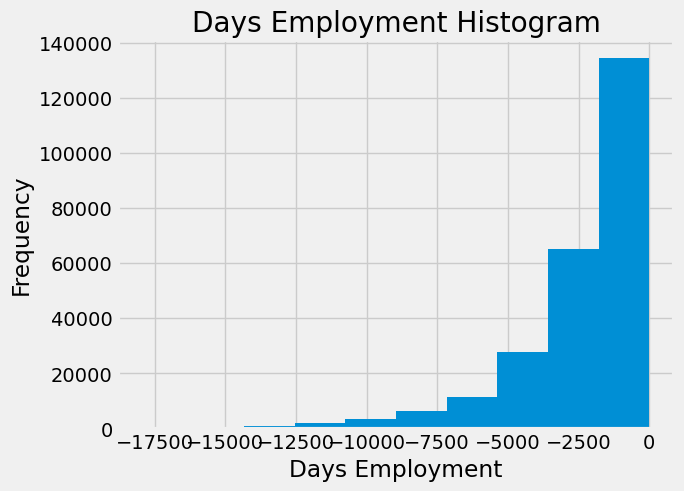

In [81]:
# Membuat kolom flag anomali
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Ganti nilai anomali dengan nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

Distribusi terlihat jauh lebih sesuai dengan apa yang saya harapkan, dan saya juga telah membuat kolom baru untuk memberi tahu model bahwa nilai-nilai ini pada awalnya adalah anomali (karena kita harus mengisi nans dengan suatu nilai, mungkin median dari kolom tersebut). Kolom lain dengan DAYS dalam dataframe terlihat sesuai dengan yang kita harapkan tanpa adanya pencilan yang jelas. Sebagai catatan yang sangat penting, apa pun yang saya lakukan pada data pelatihan juga harus kita lakukan pada data pengujian. Mari kita pastikan untuk membuat kolom baru dan mengisi kolom yang sudah ada dengan np.nan pada data pengujian.

In [82]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

There are 9274 anomalies in the test data out of 48744 entries


# Korelasi 

- 0,00-,19 "sangat lemah" 
- .20-.39 "lemah" 
- .40-.59 "sedang" 
- .60-.79 "kuat" 
- .80-1.0 "sangat kuat"

In [83]:
# menemukan korelasi dengan target dan urutkan
correlations = app_train.corr()['TARGET'].sort_values()

# Menampilkan korelasi
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati



negative linear relationship

    wine semakin tua semakin mahal --> negatif
    semakin luas tanah, maka harga jual tanah semakin tinggi --> positif



saya lihat beberapa korelasi yang lebih signifikan: DAYS_BIRTH adalah korelasi yang paling positif. (kecuali untuk TARGET karena korelasi dari sebuah variabel dengan dirinya sendiri selalu 1!) Melihat pada dokumentasi, DAYS_BIRTH adalah usia dalam hari dari klien pada saat pinjaman dalam hari yang negatif (untuk alasan apapun). Korelasinya positif, tetapi nilai dari fitur ini sebenarnya negatif, yang berarti bahwa seiring bertambahnya usia nasabah, mereka cenderung tidak akan gagal bayar pinjaman mereka (yaitu target == 0). Ini sedikit membingungkan, jadi kita akan mengambil nilai absolut dari fitur tersebut dan kemudian korelasinya menjadi negatif.

### Pengaruh Usia terhadap Pelunasan

In [84]:
# mencari korelasi hari positif sejak lahir dan target
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830984513

Seiring bertambahnya usia nasabah, terdapat hubungan linier negatif dengan target yang berarti bahwa seiring bertambahnya usia nasabah, mereka cenderung lebih sering melunasi pinjaman tepat waktu. Pertama, saya dapat membuat histogram dari usia. saya akan meletakkan sumbu x dalam tahun untuk membuat plotnya sedikit lebih mudah dimengerti.

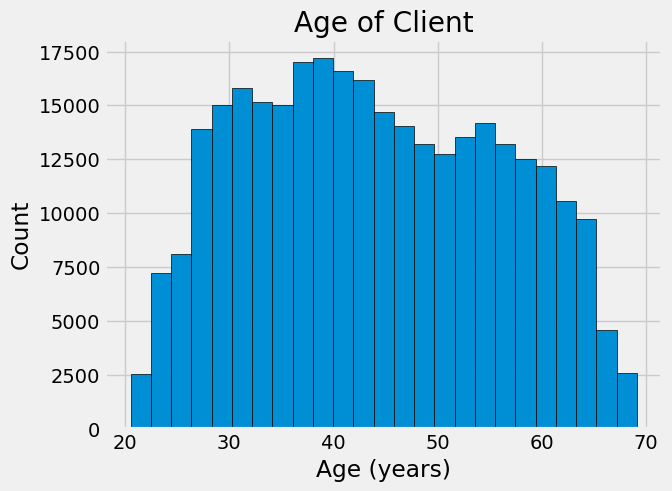

In [85]:
# Menetapkan gaya plot
plt.style.use('fivethirtyeight')

# Plotkan distribusi usia dalam tahun
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

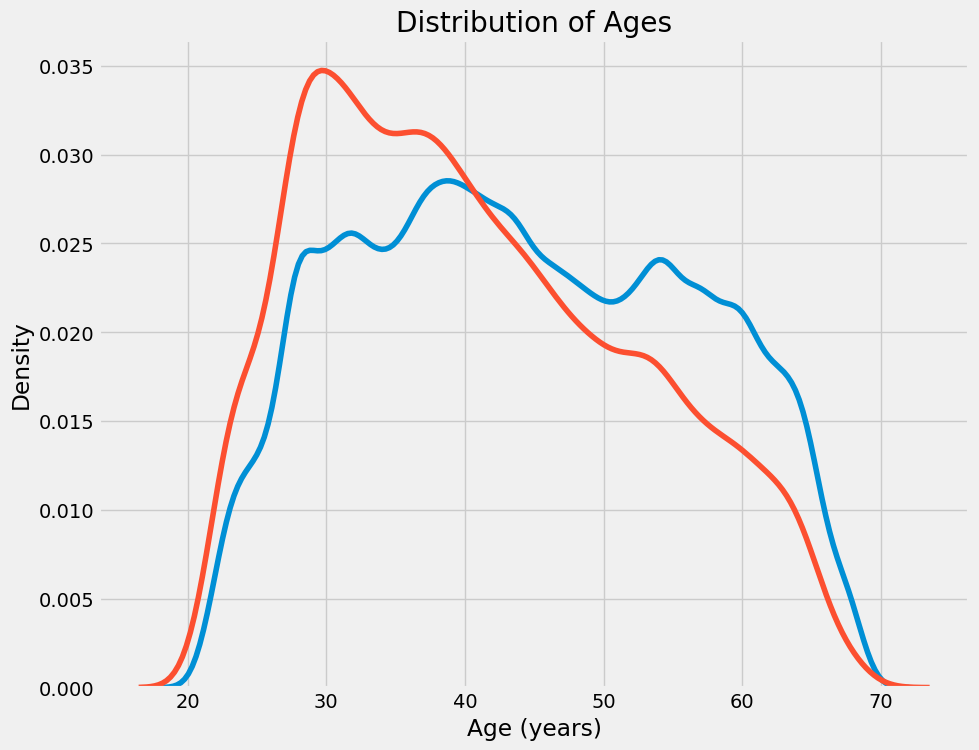

In [86]:
plt.figure(figsize = (10, 8))

# Jumlah pinjaman menggunakan KDE yang telah dilunasi tepat waktu
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# Plot KDE pinjaman yang tidak dilunasi tepat waktu
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Pelabelan plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');




Kurva target == 1 condong ke arah ujung yang lebih muda dari kisaran. Meskipun ini bukanlah korelasi yang signifikan (koefisien korelasi -0.07), variabel ini kemungkinan akan berguna dalam model pembelajaran mesin karena memang mempengaruhi target. Saya lihat hubungan ini dengan cara lain: rata-rata kegagalan membayar pinjaman berdasarkan kelompok usia. Untuk membuat grafik ini, pertama-tama saya potong kategori usia menjadi beberapa kelompok yang masing-masing terdiri dari 5 tahun. Kemudian, untuk setiap kelompok, kita menghitung nilai rata-rata dari target, yang menunjukkan rasio pinjaman yang tidak dilunasi di setiap kategori usia.

In [87]:
# informasi usia dipisahkan datanya
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Buang data usia
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [88]:
# Group by dan hitung rata-rata
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


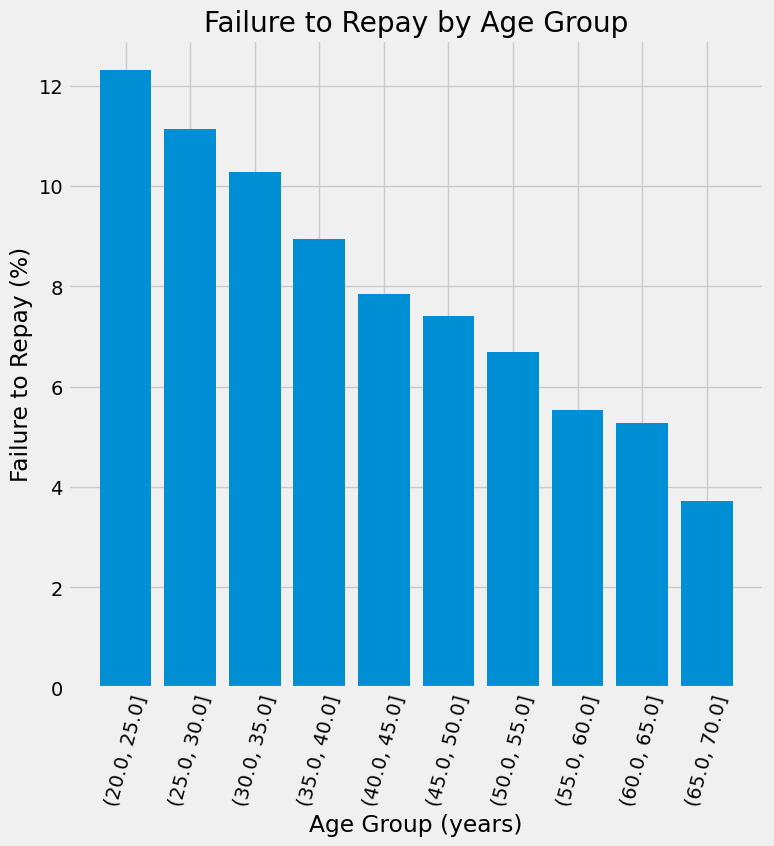

In [89]:
plt.figure(figsize = (8, 8))

# Grafik kelompok usia dan rata-rata target dengan bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Pelabelan plot
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group'); 


Ada tren yang jelas: pemohon yang lebih muda lebih mungkin untuk tidak melunasi pinjaman! Tingkat kegagalan membayar di atas 10% untuk tiga kelompok usia termuda dan di bawah 5% untuk kelompok usia tertua. Ini adalah informasi yang dapat langsung digunakan oleh bank: karena nasabah yang lebih muda lebih kecil kemungkinannya untuk melunasi pinjaman, mungkin mereka harus diberikan lebih banyak panduan atau tips perencanaan keuangan. Ini bukan berarti bank harus mendiskriminasi nasabah yang lebih muda, namun akan lebih baik jika bank mengambil tindakan pencegahan untuk membantu nasabah yang lebih muda membayar tepat waktu.

### Sumber Eksternal

Tiga variabel dengan korelasi negatif terkuat dengan target adalah `EXT_SOURCE_1`, `EXT_SOURCE_2`, dan `EXT_SOURCE_3`.
Menurut dokumentasi, fitur-fitur ini mewakili "skor yang dinormalisasi dari sumber data eksternal". Saya tidak yakin apa maksudnya, tetapi mungkin semacam peringkat kredit kumulatif yang dibuat dengan menggunakan berbagai sumber data.

Mari lihat variabel-variabel ini.

Pertama, saya dapat menunjukkan korelasi fitur `EXT_SOURCE` dengan target dan satu sama lain.




In [90]:
# Ekstrak variabel EXT_SOURCE dan tampilkan korelasinya
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


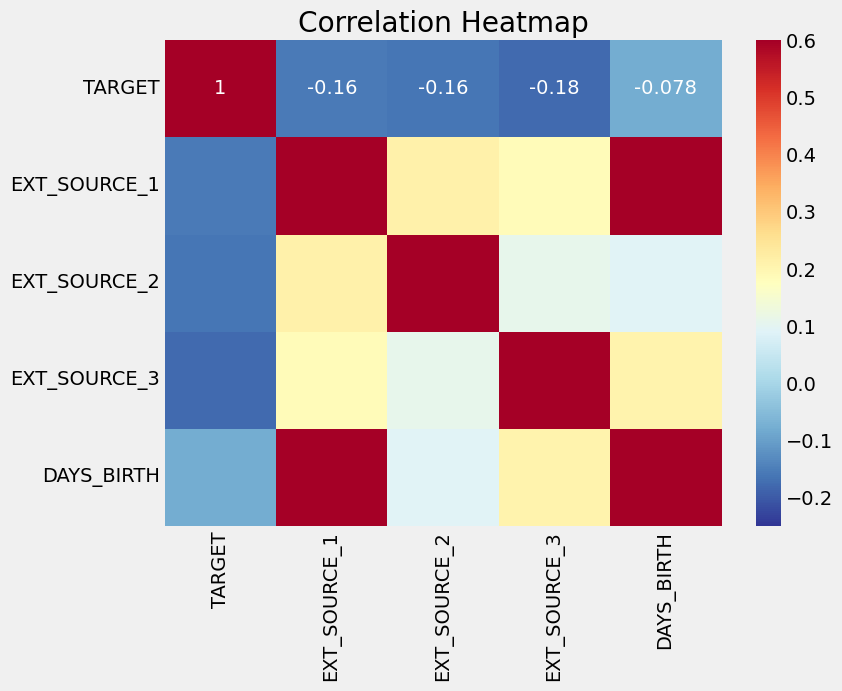

In [91]:
plt.figure(figsize = (8, 6))

# Peta panas korelasi
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

Ketiga fitur EXT_SOURCE memiliki korelasi negatif dengan target, mengindikasikan bahwa ketika nilai EXT_SOURCE meningkat, nasabah akan lebih mungkin untuk melunasi pinjamannya. saya juga dapat melihat bahwa DAYS_BIRTH berkorelasi positif dengan EXT_SOURCE_1 yang mengindikasikan bahwa mungkin salah satu faktor dari nilai ini adalah usia nasabah. Selanjutnya saya dapat melihat distribusi dari masing-masing fitur yang diwarnai oleh nilai target. Hal ini akan memungkinkan saya untuk memvisualisasikan efek dari variabel ini pada target.

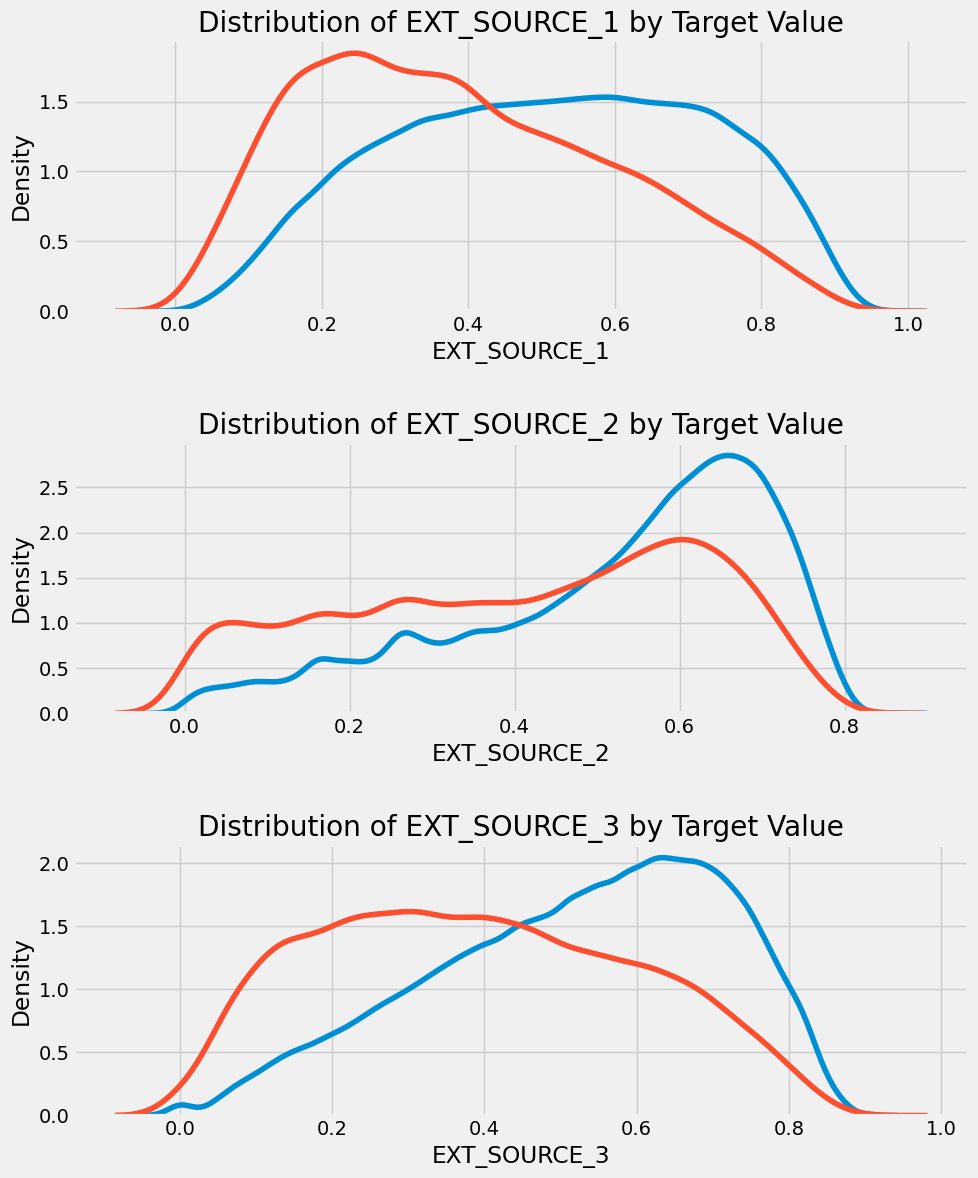

In [92]:
plt.figure(figsize = (10, 12))

# iterasi melalui sumber-sumber tersebut
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
        # membuat subplot baru untuk setiap sumber
        plt.subplot(3, 1, i + 1)
        # plot pinjaman yang sudah dilunasi
        sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
        # pinjaman kavling yang belum dilunasi
        sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
        
        # Beri label pada plot
        plt.title('Distribution of %s by Target Value' % source)
        plt.xlabel('%s' % source); plt.ylabel('Density');

plt.tight_layout(h_pad = 2.5)

EXT_SOURCE_3 menampilkan selisih terbesar antara nilai target. saya bisa melihat dengan jelas bahwa fitur ini memiliki hubungan dengan kemungkinan pemohon untuk melunasi pinjaman. Hubungannya tidak terlalu kuat (bahkan bisa dibilang sangat lemah), tapi variabel-variabel ini tetap berguna bagi model machine learning untuk memprediksi apakah seorang pemohon akan melunasi pinjamannya tepat waktu atau tidak.




# Feature Engineering

- CREDIT_INCOME_PERCENT: persentase jumlah kredit relatif terhadap pendapatan nasabah 
- ANNUITY_INCOME_PERCENT: persentase anuitas pinjaman relatif terhadap pendapatan nasabah 
- CREDIT_TERM: lama pembayaran dalam bulan (karena anuitas adalah jumlah bulanan yang harus dibayar 
- DAYS_EMPLOYED_PERCENT: persentase hari kerja relatif terhadap usia nasabah

In [93]:
app_train_domain = app_train.copy()
app_test_domain = app_test.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']

In [94]:
app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']

### Memvisualisasikan Variabel Baru

Saya akan membuat plot KDE yang sama yang diwarnai oleh nilai TARGET.

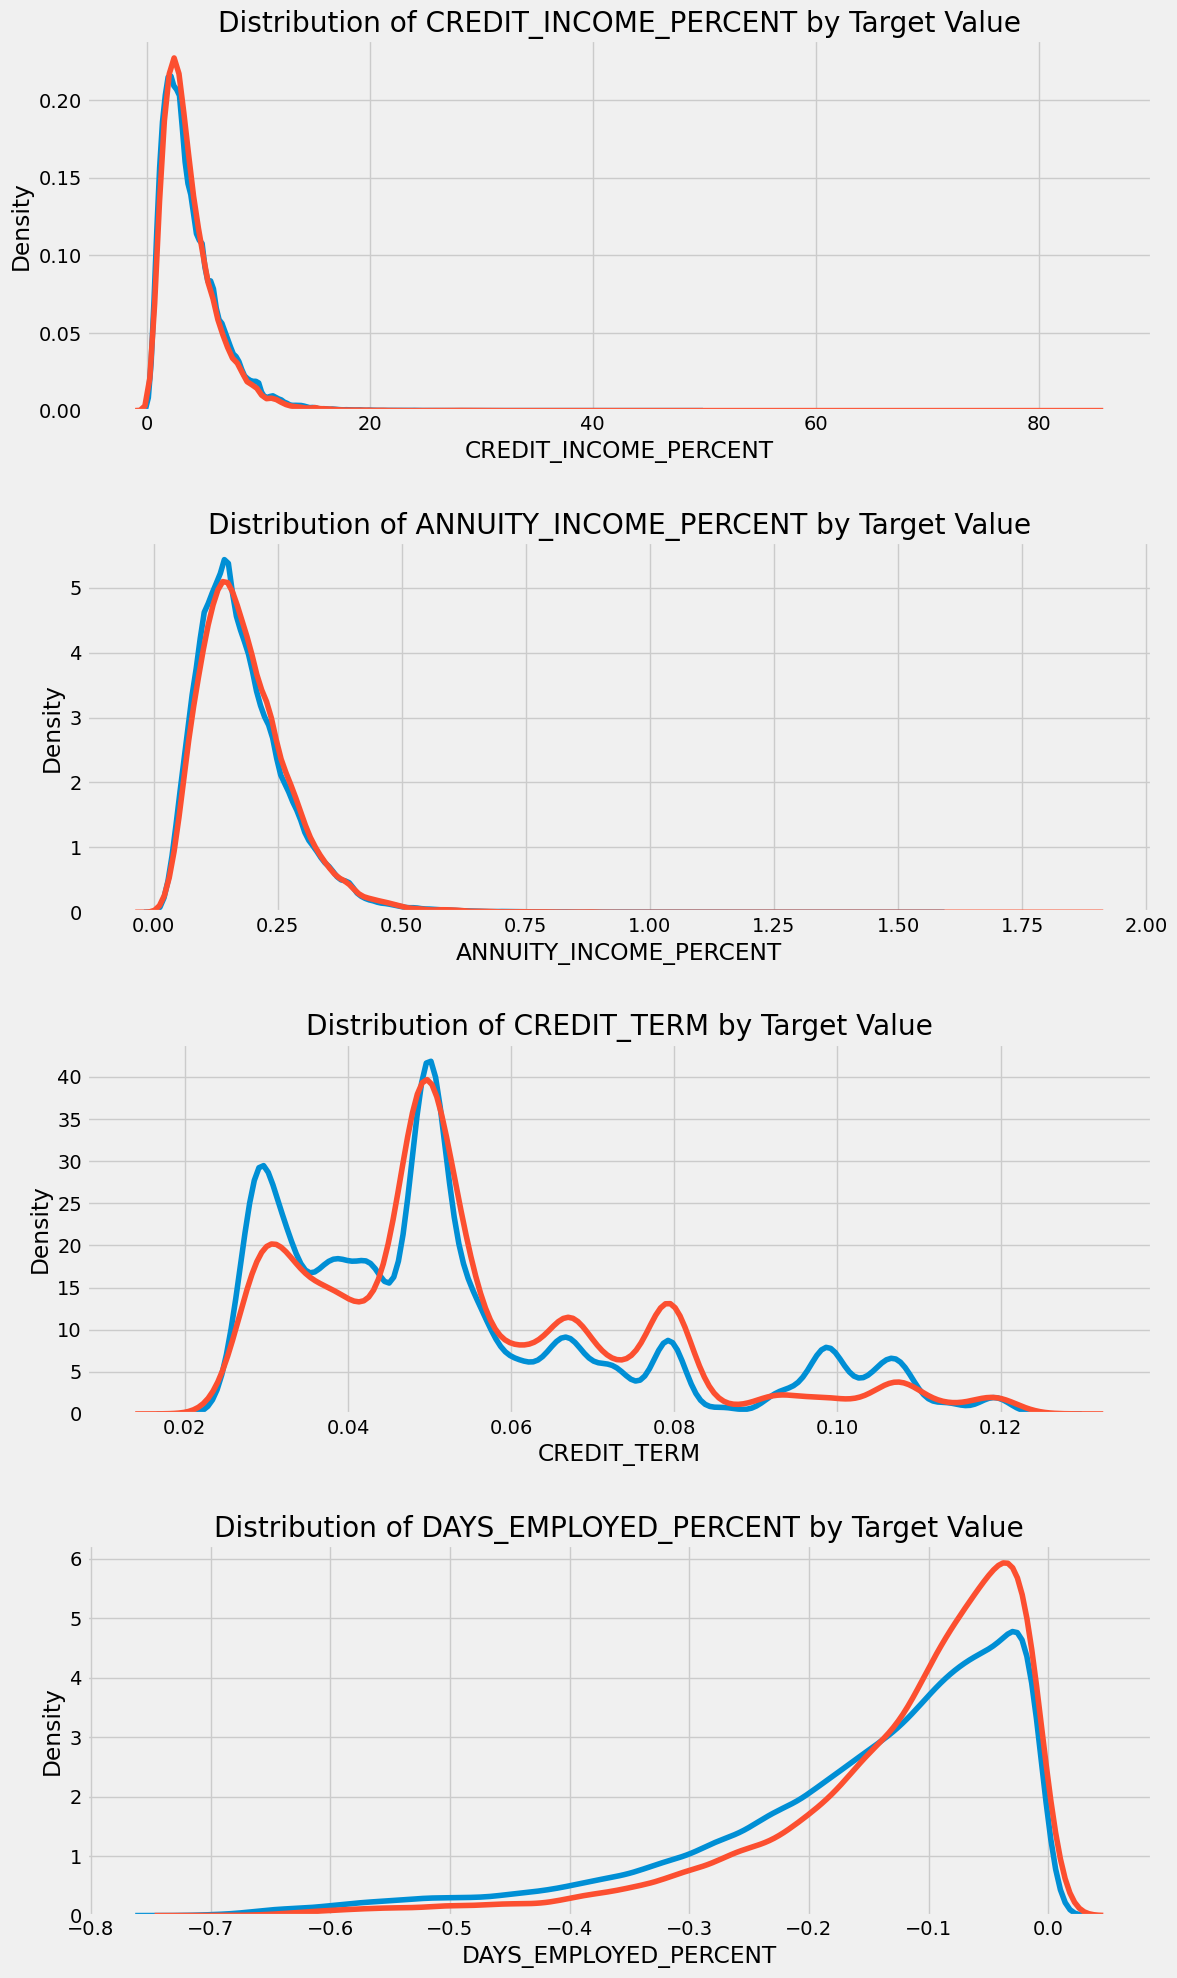

In [95]:
plt.figure(figsize = (12, 20))
# mengulangi fitur-fitur baru
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):

    # membuat subplot baru untuk setiap sumber
    plt.subplot(4, 1, i + 1)
    # plot pinjaman yang telah dilunasi
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 0, feature], label = 'target == 0')
    # pinjaman kavling yang belum dilunasi
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 1, feature], label = 'target == 1')
    
    # Beri label pada plot-plot tersebut
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');

plt.tight_layout(h_pad = 2.5)






# Implementasi Logistic Regression

saya akan melakukan prapemrosesan data dengan mengisi nilai yang hilang (imputasi) dan menormalkan rentang fitur (penskalaan fitur). Kode berikut melakukan kedua langkah preprocessing ini.

In [96]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# # Hapus target dari data train
# if 'TARGET' in app_train:
# train = app_train.drop(columns = ['TARGET'])
# else:
# train = app_train.copy()

app_train2 = app_train.dropna()
train = app_train2.drop(columns=['TARGET'])
label = app_train2['TARGET']

x_train, x_test, y_train, y_test = train_test_split(train, label, test_size=0.25, random_state=2023)

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Membuat model dengan parameter regularisasi yang ditentukan
log_reg = RandomForestClassifier(random_state=42, max_depth=3, class_weight="balanced")

# melatih data training
log_reg.fit(x_train, y_train)

# Membuat prediksi
# Pastikan untuk memilih kolom kedua saja
log_reg_pred = log_reg.predict_proba(x_test)[:, 1]
log_reg_pred_train = log_reg.predict_proba(x_train)[:, 1]

print(roc_auc_score(y_test, log_reg_pred))
print(roc_auc_score(y_train, log_reg_pred_train))

0.6937363368501094
0.7792321526311674


In [98]:
# Mengekstrak fitur-fitur penting
feature_importance_values = log_reg.feature_importances_
feature_importances = pd.DataFrame({'feature': feature, 'importance': feature_importance_values})

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Membuat model dengan parameter regularisasi yang ditentukan
log_reg2 = LogisticRegression(random_state=42)

#melatih data training
log_reg2.fit(x_train, y_train)

# Membuat prediksi
# Pastikan untuk memilih kolom kedua saja
log_reg_pred2 = log_reg2.predict_proba(x_test)[:, 1]
log_reg_pred_train2 = log_reg2.predict_proba(x_train)[:, 1]

print(roc_auc_score(y_test, log_reg_pred2))
print(roc_auc_score(y_train, log_reg_pred_train2))

0.6016680923866552
0.6139430167627892


In [100]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# # Hapus target dari data training
# if 'TARGET' in app_train:
#     train = app_train.drop(columns = ['TARGET'])
# else:
#     train = app_train.copy()

train = app_train.drop(columns=['TARGET'])
label = app_train['TARGET']

x_train, x_test, y_train, y_test = train_test_split(train, label, test_size=0.25)

# Nama-nama fitur
features = list(train.columns)

# Salin data test
test = app_test.copy()

# Imputasi median dari nilai yang hilang
imputer = SimpleImputer(strategy = 'median')

# Skala setiap fitur menjadi 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Cocokkan dengan data training
imputer.fit(x_train)

# Mentransformasi data training dan test
x_train = imputer.transform(x_train)
x_test = imputer.transform(x_test)

# Ulangi dengan scaler
scaler.fit(x_train)
train = scaler.transform(x_train)
test = scaler.transform(x_test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)




Training data shape:  (230633, 240)
Testing data shape:  (76878, 240)


saya akan menggunakan LogisticRegression dari Scikit-Learn untuk model pertama. Satu-satunya perubahan yang akan saya lakukan dari pengaturan model default adalah menurunkan parameter regularisasi, C, yang mengontrol jumlah overfitting (nilai yang lebih rendah akan mengurangi overfitting). Hal ini akan memberikan hasil yang sedikit lebih baik daripada LogisticRegression default, namun tetap akan memberikan standar yang rendah untuk model yang akan datang. Di sini saya menggunakan sintaks pemodelan Scikit-Learn yang sudah dikenal: pertama-tama saya membuat model, kemudian saya melatih model menggunakan .fit dan kemudian saya membuat prediksi pada data pengujian menggunakan .predict_proba ( saya menginginkan probabilitas dan bukan 0 atau 1).

In [101]:
from sklearn.linear_model import LogisticRegression

# Membuat model dengan parameter regularisasi yang ditentukan
log_reg = LogisticRegression(C = 0.0001)

#melatih data training
log_reg.fit(train, y_train)


LogisticRegression(C=0.0001)

Sekarang setelah model telah dilatih, saya dapat menggunakannya untuk membuat prediksi. saya ingin memprediksi probabilitas tidak membayar pinjaman, jadi saya menggunakan metode model predict.proba. Metode ini menghasilkan larik m x 2 di mana m adalah jumlah observasi. Kolom pertama adalah probabilitas dari target yang bernilai 0 dan kolom kedua adalah probabilitas dari target yang bernilai 1 (jadi untuk satu baris, kedua kolom tersebut harus berjumlah 1). saya menginginkan probabilitas pinjaman tidak dilunasi, jadi saya akan memilih kolom kedua. Kode berikut membuat prediksi dan memilih kolom yang benar.

In [103]:
pip install --upgrade scikit-learn


   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.0 MB 233.8 kB/s eta 0:00:47
   ---------------------------------------- 0.1/11.0 MB 218.6 kB/s eta 0:00:50
   ---------------------------------------- 0.1/11.0 MB 275.8 kB/s eta 0:00:40
   ---------------------------------------- 0.1/11.0 MB 275.8 kB/s eta 0:00:40
   ---------------------------------------- 0.1/11.0 MB 275.8 kB/s eta 0:00:40
   ---------------------------------------- 0.1/11.0 MB 275.8 kB/s eta 0:00:40
   ---------------------------------------- 0.1/11.0 MB 178.6 kB/s eta 0:01:01
   ------------------------

  You can safely remove it manually.


In [104]:
from sklearn.metrics import precision_score


In [107]:
from sklearn.metrics import roc_auc_score

# Membuat model dengan parameter regularisasi yang ditentukan
log_reg_pred = log_reg.predict_proba(test)[:, 1]

print(roc_auc_score(y_test, log_reg_pred))

0.6788441106763909


Prediksi harus dalam format yang ditunjukkan pada file sample_submission.csv, di mana hanya ada dua kolom: SK_ID_CURR dan TARGET. saya akan membuat dataframe dalam format ini dari set pengujian dan prediksi yang disebut submit.

## Model yang Ditingkatkan: Random Forest


saya coba menggunakan Random Forest pada data pelatihan yang sama untuk melihat bagaimana hal tersebut mempengaruhi kinerja.

In [109]:
from sklearn.ensemble import RandomForestClassifier

# Membuat pengklasifikasi Random Forest

random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)



In [110]:
# melatih data training
random_forest.fit(train, y_train)

# Mengekstrak fitur-fitur penting
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Membuat prediksi pada data test
predictions = random_forest.predict_proba(test)[:, 1]



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  7.7min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    7.4s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:   14.8s finished


In [111]:
print(roc_auc_score(y_test, predictions))


0.7128902692760862


In [118]:
pip install --upgrade scikit-learn


In [122]:
def plot_feature_importances(df):
    """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better.

    Args:
        df (dataframe): feature importances. Must have the features in a column
        called `features` and the importances in a column called `importance

    Returns:
        shows a plot of the 15 most importance features

        df (dataframe): feature importances sorted by importance (highest to lowest)
        with a column for normalized importance
        """

    # Urutkan fitur menurut tingkat kepentingan
    df = df.sort_values('importance', ascending = False).reset_index()

    # normalisasi kepentingan fitur untuk menambahkan hingga satu
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Buatlah diagram batang horizontal tentang pentingnya fitur
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()

    # Perlu membalikkan indeks untuk memplot yang paling penting di atas
    ax.barh(list(reversed(list(df.index[:15]))),
            df['importance_normalized'].head(15),
            align = 'center', edgecolor = 'k')

    # Atur yticks dan label
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))

    # Pelabelan plot
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()

    return df

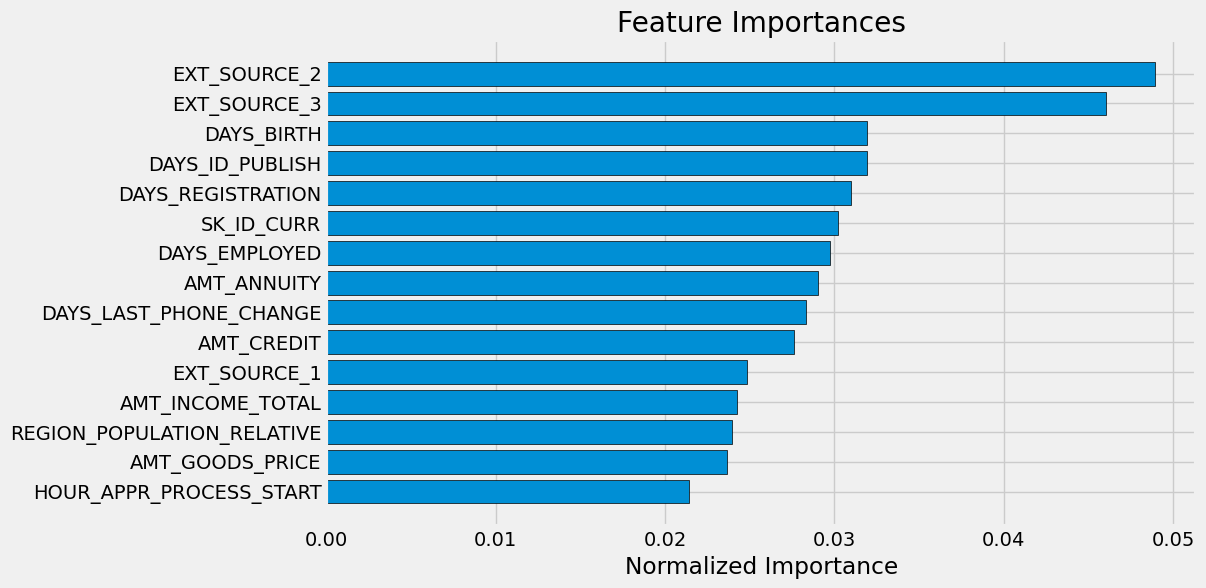

In [123]:
# Menampilkan  fitur fitur pentin untuk fitur default

feature_importances_sorted = plot_feature_importances(feature_importances)




Seperti yang diharapkan, fitur yang paling penting adalah fitur yang berhubungan dengan EXT_SOURCE dan DAYS_BIRTH. saya melihat bahwa hanya ada beberapa fitur yang sangat penting bagi model, yang menunjukkan bahwa saya mungkin dapat menghilangkan banyak fitur tanpa penurunan kinerja (dan saya bahkan dapat melihat peningkatan kinerja).
